## Phase 3

### Header
#### Course Name: CSE 487/587
#### Project name: Predicting gentrification in New York City
#### Name of group member:
* Jan Voltaire Vergara 
* Ze Ming Zhang 

### Q Write down the following information: 
#### 1. Problem Statement: 



#### 2. Hypothesis:
   + hypothesis 1: As the rent and home values rise for a puma in New York city, potentially this would cause the decrease of n - 2 race category percentage in that puma, assuming n is the total number of race categories. This would cause a leak in diversity in certain pumas where a single or dual race caterology begins to dominate, we define this as gentraication in this project. We predict that the puma with the highest risk of gentrifying are the pumas that have a history of increasing home value and percentage of rent to income, as well as an increase in only white racial percentage.
 
   + hypothesis 2: Demographic variables often have spatial dependencies. We believe that using space and time as a feature can help increase predictability power. Such a question came from the idea of incorporating the theory of endogenous gentrification. 

   + hypothesis 3: White race are gentrifiers, and BIPOC race are more susceptible to be displaced from gentrification

#### 3 Cleaned Datasets
Display the cleaned dataset after phase 1


In [517]:
import pandas as pd 
df_to_model = pd.read_csv('phase3_complete.csv')
df_to_model

,puma,year,mergeid,estimate_total_pop,gini_index,percent_second_mortgage,percent_owner_occupied,percent_renter_occupied,percent_vacant_housing,homeowner_vacancy_rate,...,disability_status_pct_change_moran_features,total_housing_units_pct_change_moran_features,num_renter_occupied_pct_change_moran_features,num_owner_occupied_pct_change_moran_features,num_total_occupied_pct_change_moran_features,percent_born_us_pct_change_moran_features,english_prof_pct_change_moran_features,percent_college_pct_change_moran_features,percent_uninsured_pct_change_moran_features,diversity_change
0,3702.0,2013,3603702 _ 2013,143560,0.4375,13.400000,36.8,63.2,7.9,2.2,...,0.004902,0.001362,0.024602,-0.053819,-0.000482,-0.008174,0.021507,-0.005307,-0.056097,True
1,3702.0,2014,3603702 _ 2014,141622,0.4458,13.700000,36.1,63.9,8.3,2.0,...,0.002415,0.008628,0.021667,-0.036663,0.010083,-0.005503,0.014102,0.019650,-0.041182,True
2,3702.0,2015,3603702 _ 2015,143158,0.4518,12.400000,36.6,63.4,7.6,2.0,...,0.025014,-0.004482,0.005659,-0.020842,0.001688,-0.006060,0.045306,0.028816,-0.082247,False
3,3702.0,2016,3603702 _ 2016,144341,0.4520,11.800000,36.9,63.1,7.1,2.2,...,0.013774,0.000695,0.000857,0.009186,0.007960,-0.015912,0.030663,-0.008204,-0.086065,False
4,3702.0,2017,3603702 _ 2017,147447,0.4587,9.428870,38.6,61.4,6.7,1.8,...,0.047727,0.004580,-0.007552,0.058576,0.008807,-0.000272,0.025288,0.009379,-0.093094,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,4114.0,2013,3604114 _ 2013,116048,0.4851,22.500000,38.2,61.8,13.4,2.9,...,-0.011211,0.003809,0.009656,-0.001065,0.004129,-0.000536,0.009589,0.026603,-0.020529,False
266,4114.0,2014,3604114 _ 2014,117470,0.4915,18.300000,37.4,62.6,12.4,2.5,...,0.007918,0.004856,0.011374,-0.000228,0.007728,-0.000975,0.009036,0.028064,-0.038455,False
267,4114.0,2015,3604114 _ 2015,118917,0.4852,15.400000,36.8,63.2,12.6,2.1,...,0.020936,0.005276,0.011317,-0.001717,0.008112,-0.001237,0.011099,0.028349,-0.083132,False
268,4114.0,2016,3604114 _ 2016,121517,0.4954,15.100000,36.7,63.3,11.7,1.8,...,0.018799,0.006858,0.006297,0.010166,0.009231,-0.000968,0.007257,0.031810,-0.101762,False


#### 4 Modeling  
Please take a look at https://scikit-learn.org/stable/. First of all, understand what is the problem of your research such as classification problem, regression problem, clustering problem...... Then choose your algorithm. For each algorithm, you need to answer the following 5 questions. We give the example answer in section 6. 

**4.1 Method 1**

#### Q: What assumptions need to be verified at this step?
#### A: A logistic regression conducts an odds ratio of whether the input is more likely to be in a certain class. However, a logistic regression makes this key assumption that the frequency of diversity changes and its correlating features are the same for every year and every location. Can such a simplistic and unmalleable process be enough for our data set? 
#### Q: What algorithm did you choose?
#### A: Logistic Regression 
#### Q: Why you choose this algorithm?
#### A: This algorithm was chosen because logistic regression can give us a boolean (divided by the regression line)  which makes it easy to test our feature prediction for our premature hypothesis, it is also easier to implement, interpret, and very efficient to train, this model will tell if prediction of gentrification with the diversity ratio is adequate.   However, due to the simplicity of logistic regression, we may be able to identify whether our prediction task is best suitable for a simpler model or not.
#### Q: What metric can measure the quality of your algorithm?
#### A: We use percentage of accuracy To represent the quality of the logistic regression algorithm. The logistic regression algorithm will predict and return a list of classes predicted from the given test input values, then based on the predictions using a sklearn function we can compare those values and our test labels into a percentage of accuracy to represent the performance of the regression algorithm on this data set. 

#### Q: What is the outcome?
#### A: The outcome is that it appears that logistic regression is not able to fully recognize which PUMA in New York City are going to change demographically.
#### Q: Analysis and discussion:
#### A: Since puma statistics and wealth/race correlations can not be measured by a clear cut line, this logistic regression model does not efficiently classify the expected classes.  We need to use a model with a soft margin and more weight on the detail of the features given

In [518]:
# code for modeling
from sklearn.linear_model import LogisticRegression  
from sklearn.ensemble import RandomForestClassifier 
from IPython.display import clear_output
from collections import defaultdict 
from sklearn.linear_model import LogisticRegression 
import time
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve 
%matplotlib agg
# time series split 
df = df_to_model.copy().drop(['puma','PUMA','mergeid','geometry','year_moran_features'], axis = 1)
completion = 0
lst_of_plots = []
predictions_dict = defaultdict(tuple)
for yr in range(2015, 2018): # we start with 2014 since anything below is not enough data 
    training_df = df[df['year'] < yr].copy()
    target_df  = df[df['year'] == yr].copy()
    cols_to_drop = ['year', 'diversity_change']
    X_train, y_train = training_df.drop(cols_to_drop, axis = 1), training_df['diversity_change'] 
    X_test, y_test =  target_df.drop(cols_to_drop, axis = 1), target_df['diversity_change']
   
    model = LogisticRegression(C = 1)
    model.fit(X_train,y_train)
    predictions_dict[yr] = (model.predict(X_test), y_test)
    plot = plot_roc_curve(model,X_test,y_test)
    lst_of_plots.append((yr,plot))
    print(completion /  (2018-2011)*100)
    completion += 1 
    clear_output(wait=True)

28.57142857142857


C:\Users\Voltaire Vergara\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# The model does very bad 

In [519]:
from sklearn.metrics import classification_report
y_true = predictions_dict[2017][1]
y_pred =  predictions_dict[2017][0]
metrics = classification_report(y_true, y_pred, output_dict=True)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

       False       0.74      0.84      0.79        31
        True       0.74      0.61      0.67        23

    accuracy                           0.74        54
   macro avg       0.74      0.72      0.73        54
weighted avg       0.74      0.74      0.74        54



# what we see here is that the logistic regression model does poorly on all of the years 

Text(1.0, 0.506, 'random guess line')

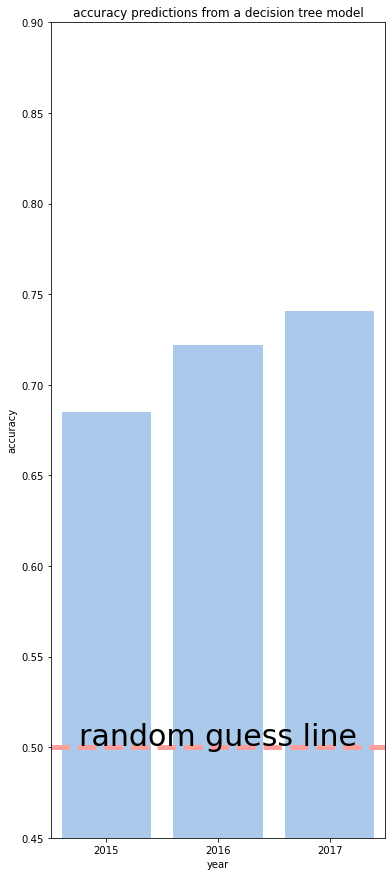

In [520]:
from sklearn.metrics import accuracy_score
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")
accuracies_frommodel = []
for key_yr in predictions_dict:
    y_true = predictions_dict[key_yr][1]
    y_pred =  predictions_dict[key_yr][0]
    accuracy = accuracy_score(y_true,y_pred)
    accuracies_frommodel.append([key_yr,accuracy])
acc = pd.DataFrame(accuracies_frommodel,columns= ['year','accuracy'])
g = sns.barplot(x="year", y="accuracy",label="year",data=acc, color = 'b')
ax.set(ylim=(.45, .9))
ax.axhline(.5, ls='--',c='r',lw = 5)
ax.set_title('accuracy predictions from a decision tree model')
plt.text(1., 0.506, 'random guess line', fontsize=30, va='center', ha='center')

In [521]:
import matplotlib.pyplot as plt
%matplotlib inline 
plot_count = 0
figs = []
for idx,roc_plots in enumerate(lst_of_plots):
    ax = roc_plots[1].ax_
    fig =  roc_plots[1].figure_
    year_roc = roc_plots[0]
    ax.set_title( str(year_roc) + ' ROC Curve from logistic Regression')
    figs.append(fig)


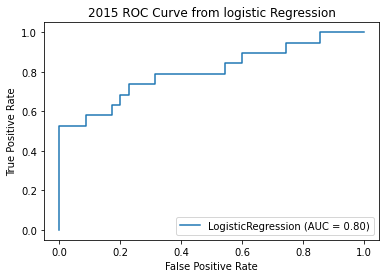

In [522]:
figs[0] # prediction ROC from 2015

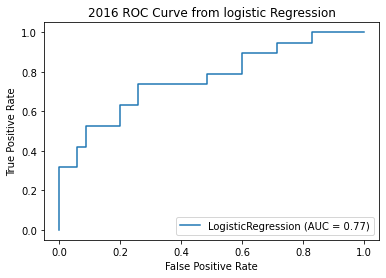

In [523]:
figs[1] # prediction ROC from 2016

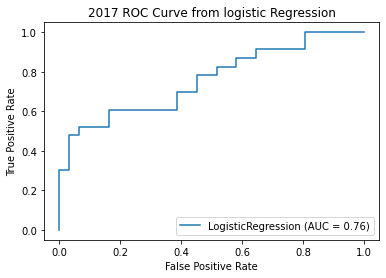

In [524]:
figs[2] # prediction ROC from 2017
#our ROC becomes lower and lower 

**4.2 Method 2**

#### Q: What assumptions need to be verified at this step?
#### A: Given a scenario gentrification has clustering of values, therefore we expect that K-nearest neighbors do particularly well due to certain PUMA exhibiting the same correlating variables. However, KNN has a specific assumption that all the variables have the same variance. But a key assumption made here is that we set the number of clusters to 3. The number 3 was chosen due to when the team conducted hyperparameter experimentation, we saw that 3 centroids were the optimal number that yielded the highest accuracy. Furthermore, the use of 3  centroids was also restated during the EDA process where we found 3 groups having correlation towards gentrification
#### Q: What algorithm did you choose?
#### A: We choose K-nearest neighbors classifier 
#### Q: Why you choose this algorithm?
#### A: Robust with regard to the search space; for instance, classes don't have to be linearly separable. Classifiers can be updated online at very little cost as new instances with known classes are presented.  Few parameters to tune: distance metric and k. Compared to the logistic regression from the first experiment, this model may be better considering 
#### Q: What metric can measure the quality of your algorithm?
#### A: We still used the rate of accuracy to measure the performance of our algorithm, we also kept the labels for the data from the logistic regression, the data set remains the same as well.

#### Q: What is the outcome?
#### A: We had an 83 percent accuracy, so if this model predicts 100 diversity change among the years about 83 times of the 100 percent the model correctly predicts the path of the diversity curve.
#### Q: Analysis and discussion:
#### A: Instead of drawing a line through the data the KNN splits the data byt curves and enclaves which de-generalizes the feature difference. Instead of balancing all the feature and try to find a formula for a single boundary the logica regress undermines a lot of important features, while KNN are like a piecewise function, where we can ground and split features on many key occasions. 

In [525]:
# code for modeling
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from IPython.display import clear_output
from collections import defaultdict 
from sklearn.ensemble import RandomForestClassifier
# time series split 
df #= df.copy().drop(['puma','PUMA','mergeid','geometry'], axis = 1)
completion = 0
idxs_for_cv = []
predictions_dict = defaultdict(tuple)
for yr in range(2015, 2018): # we start with 2014 since anything below is not enough data 
    training_df = df[df['year'] < yr].copy()
    target_df  = df[df['year'] == yr].copy()
    cols_to_drop = ['year','diversity_change']
    X_train, y_train = training_df.drop(cols_to_drop, axis = 1), training_df['diversity_change'] 
    X_test, y_test =  target_df.drop(cols_to_drop, axis = 1), target_df['diversity_change']
    #X_train, X_test = pca.fit_transform(X_train), pca.fit_transform(X_test)
    model = KNeighborsClassifier(n_neighbors = 3)
    model.fit(X_train,y_train)
    predictions_dict[yr] = (model.predict(X_test), y_test)
    idxs_for_cv.append((list(X_train.index),list(y_test.index)))
    print(completion /  (2018-2011)*100)
    completion += 1 
    clear_output(wait=True)

28.57142857142857


In [526]:
from sklearn.metrics import classification_report
y_true = predictions_dict[2017][1]
y_pred =  predictions_dict[2017][0]
metrics = classification_report(y_true, y_pred, output_dict=True)
print(classification_report(y_true, y_pred))
# WOW even worse.. 

              precision    recall  f1-score   support

       False       0.81      0.94      0.87        31
        True       0.89      0.70      0.78        23

    accuracy                           0.83        54
   macro avg       0.85      0.82      0.82        54
weighted avg       0.84      0.83      0.83        54



# For K-nearest neighbors.. it does particularly well compared to the logistic regression model 

Text(1.0, 0.506, 'random guess line')

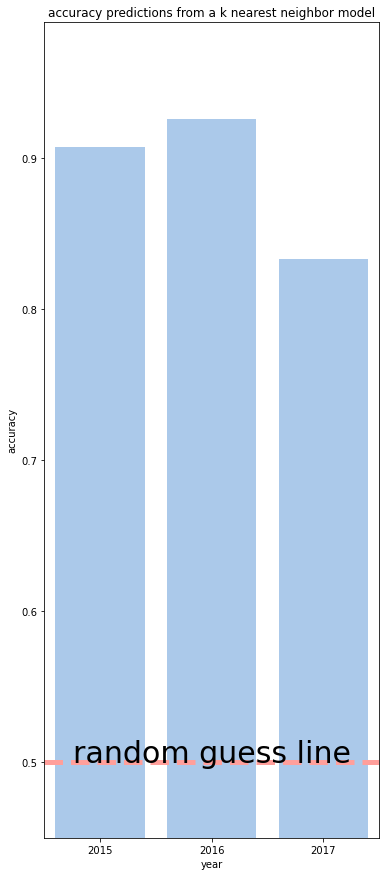

In [527]:
from sklearn.metrics import accuracy_score
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")
accuracies_frommodel = []
for key_yr in predictions_dict:
    y_true = predictions_dict[key_yr][1]
    y_pred =  predictions_dict[key_yr][0]
    accuracy = accuracy_score(y_true,y_pred)
    accuracies_frommodel.append([key_yr,accuracy])
acc = pd.DataFrame(accuracies_frommodel,columns= ['year','accuracy'])
g = sns.barplot(x="year", y="accuracy",label="year",data=acc, color = 'b')
ax.set(ylim=(.45, .99))
ax.axhline(.5, ls='--',c='r',lw = 5)
ax.set_title('accuracy predictions from a k nearest neighbor model')
plt.text(1., 0.506, 'random guess line', fontsize=30, va='center', ha='center')

In [528]:
import matplotlib.pyplot as plt
%matplotlib inline 
plot_count = 0
figs = []
for idx,roc_plots in enumerate(lst_of_plots):
    ax = roc_plots[1].ax_
    fig =  roc_plots[1].figure_
    year_roc = roc_plots[0]
    ax.set_title( str(year_roc) + ' ROC Curve from K nearest neighbor')
    figs.append(fig)

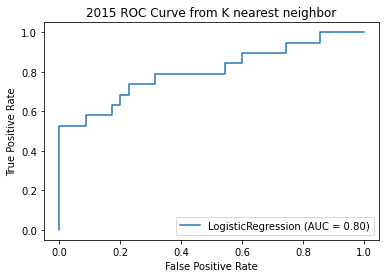

In [529]:
figs[0] # prediction ROC from 2015

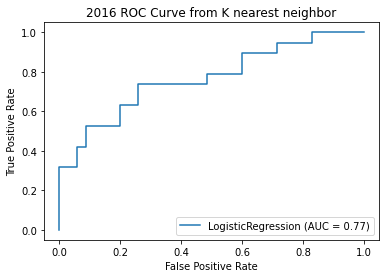

In [530]:
figs[1] # prediction ROC from 2016

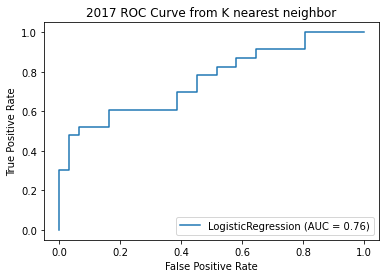

In [531]:
figs[2] # prediction ROC from 2017

**4.3 Method 3**

#### Q: What assumptions need to be verified at this step?
#### A: In this context, we are trying to identify whether gentrification has a decision-like process from which it can predict gentrification. Much like from the news or literature, you often hear gentrification as a conclusive pattern like a process where revitalization occurs, then demographic shift, and then displacement. From this, we can verify whether the decisions from the decision tree follow the same conclusions as the news report or literature from gentrification. 
 
#### Q: What algorithm did you choose?
#### A: We used a decision tree- which splits the data into different branches to a tree based on the features and just like a binary search algorithm the input test data is going to go down the most fitted branch until it can fall into a classified bound.  
#### Q: Why you choose this algorithm?
#### A:we choose a decision tree due to its ease of interpretability and feature selection component of the algorithm. Due to the nature of gentrification being much like a series of decision like processes, the team believed that the use of a decision tree will help us see how gentrification revolved around NYC. Furthermore, the story-like process of gentrification perfectly fits well, due to using a decision tree, we may be able to use the tree output to verify whether these models also use the same story much like from the news or literature. 

#### Q: What metric can measure the quality of your algorithm?
#### A: Rate of accuracy. We also use outputs of the tree decision to see its Gini Indexes and how it made decisions. 
#### Q: What is the outcome?
#### A: Three outcomes are split into 3 sections with  each section representing each year’s prediction from 2015 to 2017. The rate of accuracy increases as the false positive rate for each puma increases meaning as more predictions we do we have more right and wrong predictions, however our average rate of accuray is around 82 percent. Furthermore, from the output decision tree graph, we proved two of our hypothesis that spatial dependencies are an important predictor of gentrification, and that gentrifiers are college educated. 

#### Q: Analysis and discussion:
#### A: A decision tree will be easy to implement for the programmer and also assist because it is very easy to visualize. Unlike other models the decision tree can give you a definite Asatru standing what's the difference and similarities between each puma in this case of a given period. It is all so much simpler and other models. Additionally as shown below when doing the prediction all feature columns are examined and evaluated in this decision tree as we don't have to sorry about the model classifying only based on one feature of a given data.  


In [532]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [533]:
# code for modeling
from sklearn.linear_model import LogisticRegression  
from sklearn.ensemble import RandomForestClassifier 
from IPython.display import clear_output
from collections import defaultdict 
import time
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve 
%matplotlib agg
# time series split 
df = df_to_model.copy().drop(['puma','PUMA','mergeid','geometry'], axis = 1)
completion = 0
lst_of_plots = []
predictions_dict = defaultdict(tuple)
for yr in range(2015, 2018): # we start with 2014 since anything below is not enough data 
    training_df = df[df['year'] < yr].copy()
    target_df  = df[df['year'] == yr].copy()
    cols_to_drop = ['year', 'diversity_change']
    X_train, y_train = training_df.drop(cols_to_drop, axis = 1), training_df['diversity_change'] 
    X_test, y_test =  target_df.drop(cols_to_drop, axis = 1), target_df['diversity_change']
   
    model = DecisionTreeClassifier(min_samples_leaf=5)
    model.fit(X_train,y_train)
    predictions_dict[yr] = (model.predict(X_test), y_test)
    plot = plot_roc_curve(model,X_test,y_test)
    lst_of_plots.append((yr,plot))
    print(completion /  (2018-2011)*100)
    completion += 1 
    clear_output(wait=True)

28.57142857142857


In [534]:
from sklearn.metrics import classification_report
y_true = predictions_dict[2017][1]
y_pred =  predictions_dict[2017][0]
metrics = classification_report(y_true, y_pred, output_dict=True)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

       False       0.78      0.94      0.85        31
        True       0.88      0.65      0.75        23

    accuracy                           0.81        54
   macro avg       0.83      0.79      0.80        54
weighted avg       0.83      0.81      0.81        54



# decision tree is more stable throughout the years

Text(1.0, 0.506, 'random guess line')

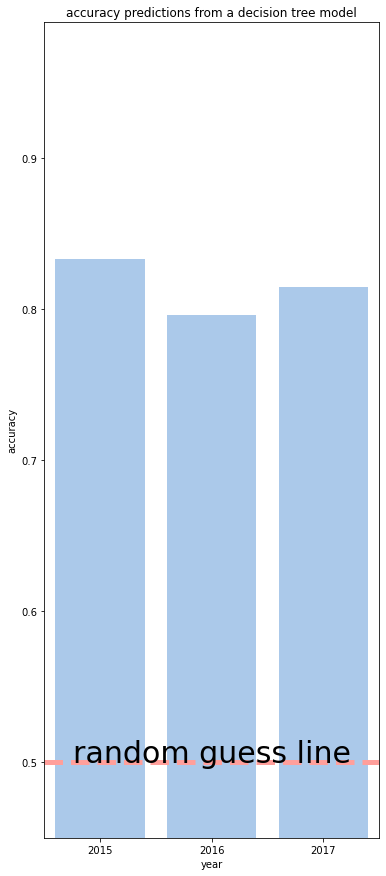

In [535]:
from sklearn.metrics import accuracy_score
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")
accuracies_frommodel = []
for key_yr in predictions_dict:
    y_true = predictions_dict[key_yr][1]
    y_pred =  predictions_dict[key_yr][0]
    accuracy = accuracy_score(y_true,y_pred)
    accuracies_frommodel.append([key_yr,accuracy])
acc = pd.DataFrame(accuracies_frommodel,columns= ['year','accuracy'])
g = sns.barplot(x="year", y="accuracy",label="year",data=acc, color = 'b')
ax.set(ylim=(.45, .99))
ax.axhline(.5, ls='--',c='r',lw = 5)
ax.set_title('accuracy predictions from a decision tree model')
plt.text(1., 0.506, 'random guess line', fontsize=30, va='center', ha='center')

In [536]:
text_representation = tree.export_text(model,feature_names=list(X_train.columns))
print(text_representation)

|--- english_prof <= 33.10
|   |--- estimate_black_females_moran_features <= 46612.37
|   |   |--- percent_vacant_housing <= 5.00
|   |   |   |--- class: True
|   |   |--- percent_vacant_housing >  5.00
|   |   |   |--- num_owner_occupied <= 6878.50
|   |   |   |   |--- percent_born_us <= 64.80
|   |   |   |   |   |--- class: True
|   |   |   |   |--- percent_born_us >  64.80
|   |   |   |   |   |--- class: False
|   |   |   |--- num_owner_occupied >  6878.50
|   |   |   |   |--- percent_owner_cost_burdent <= 56.85
|   |   |   |   |   |--- homeowner_vacancy_rate <= 4.35
|   |   |   |   |   |   |--- estimate_total_pop_moran_features <= 185342.20
|   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |--- estimate_total_pop_moran_features >  185342.20
|   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |--- homeowner_vacancy_rate >  4.35
|   |   |   |   |   |   |--- class: False
|   |   |   |   |--- percent_owner_cost_burdent >  56.85
|   |   |   |   |   |---

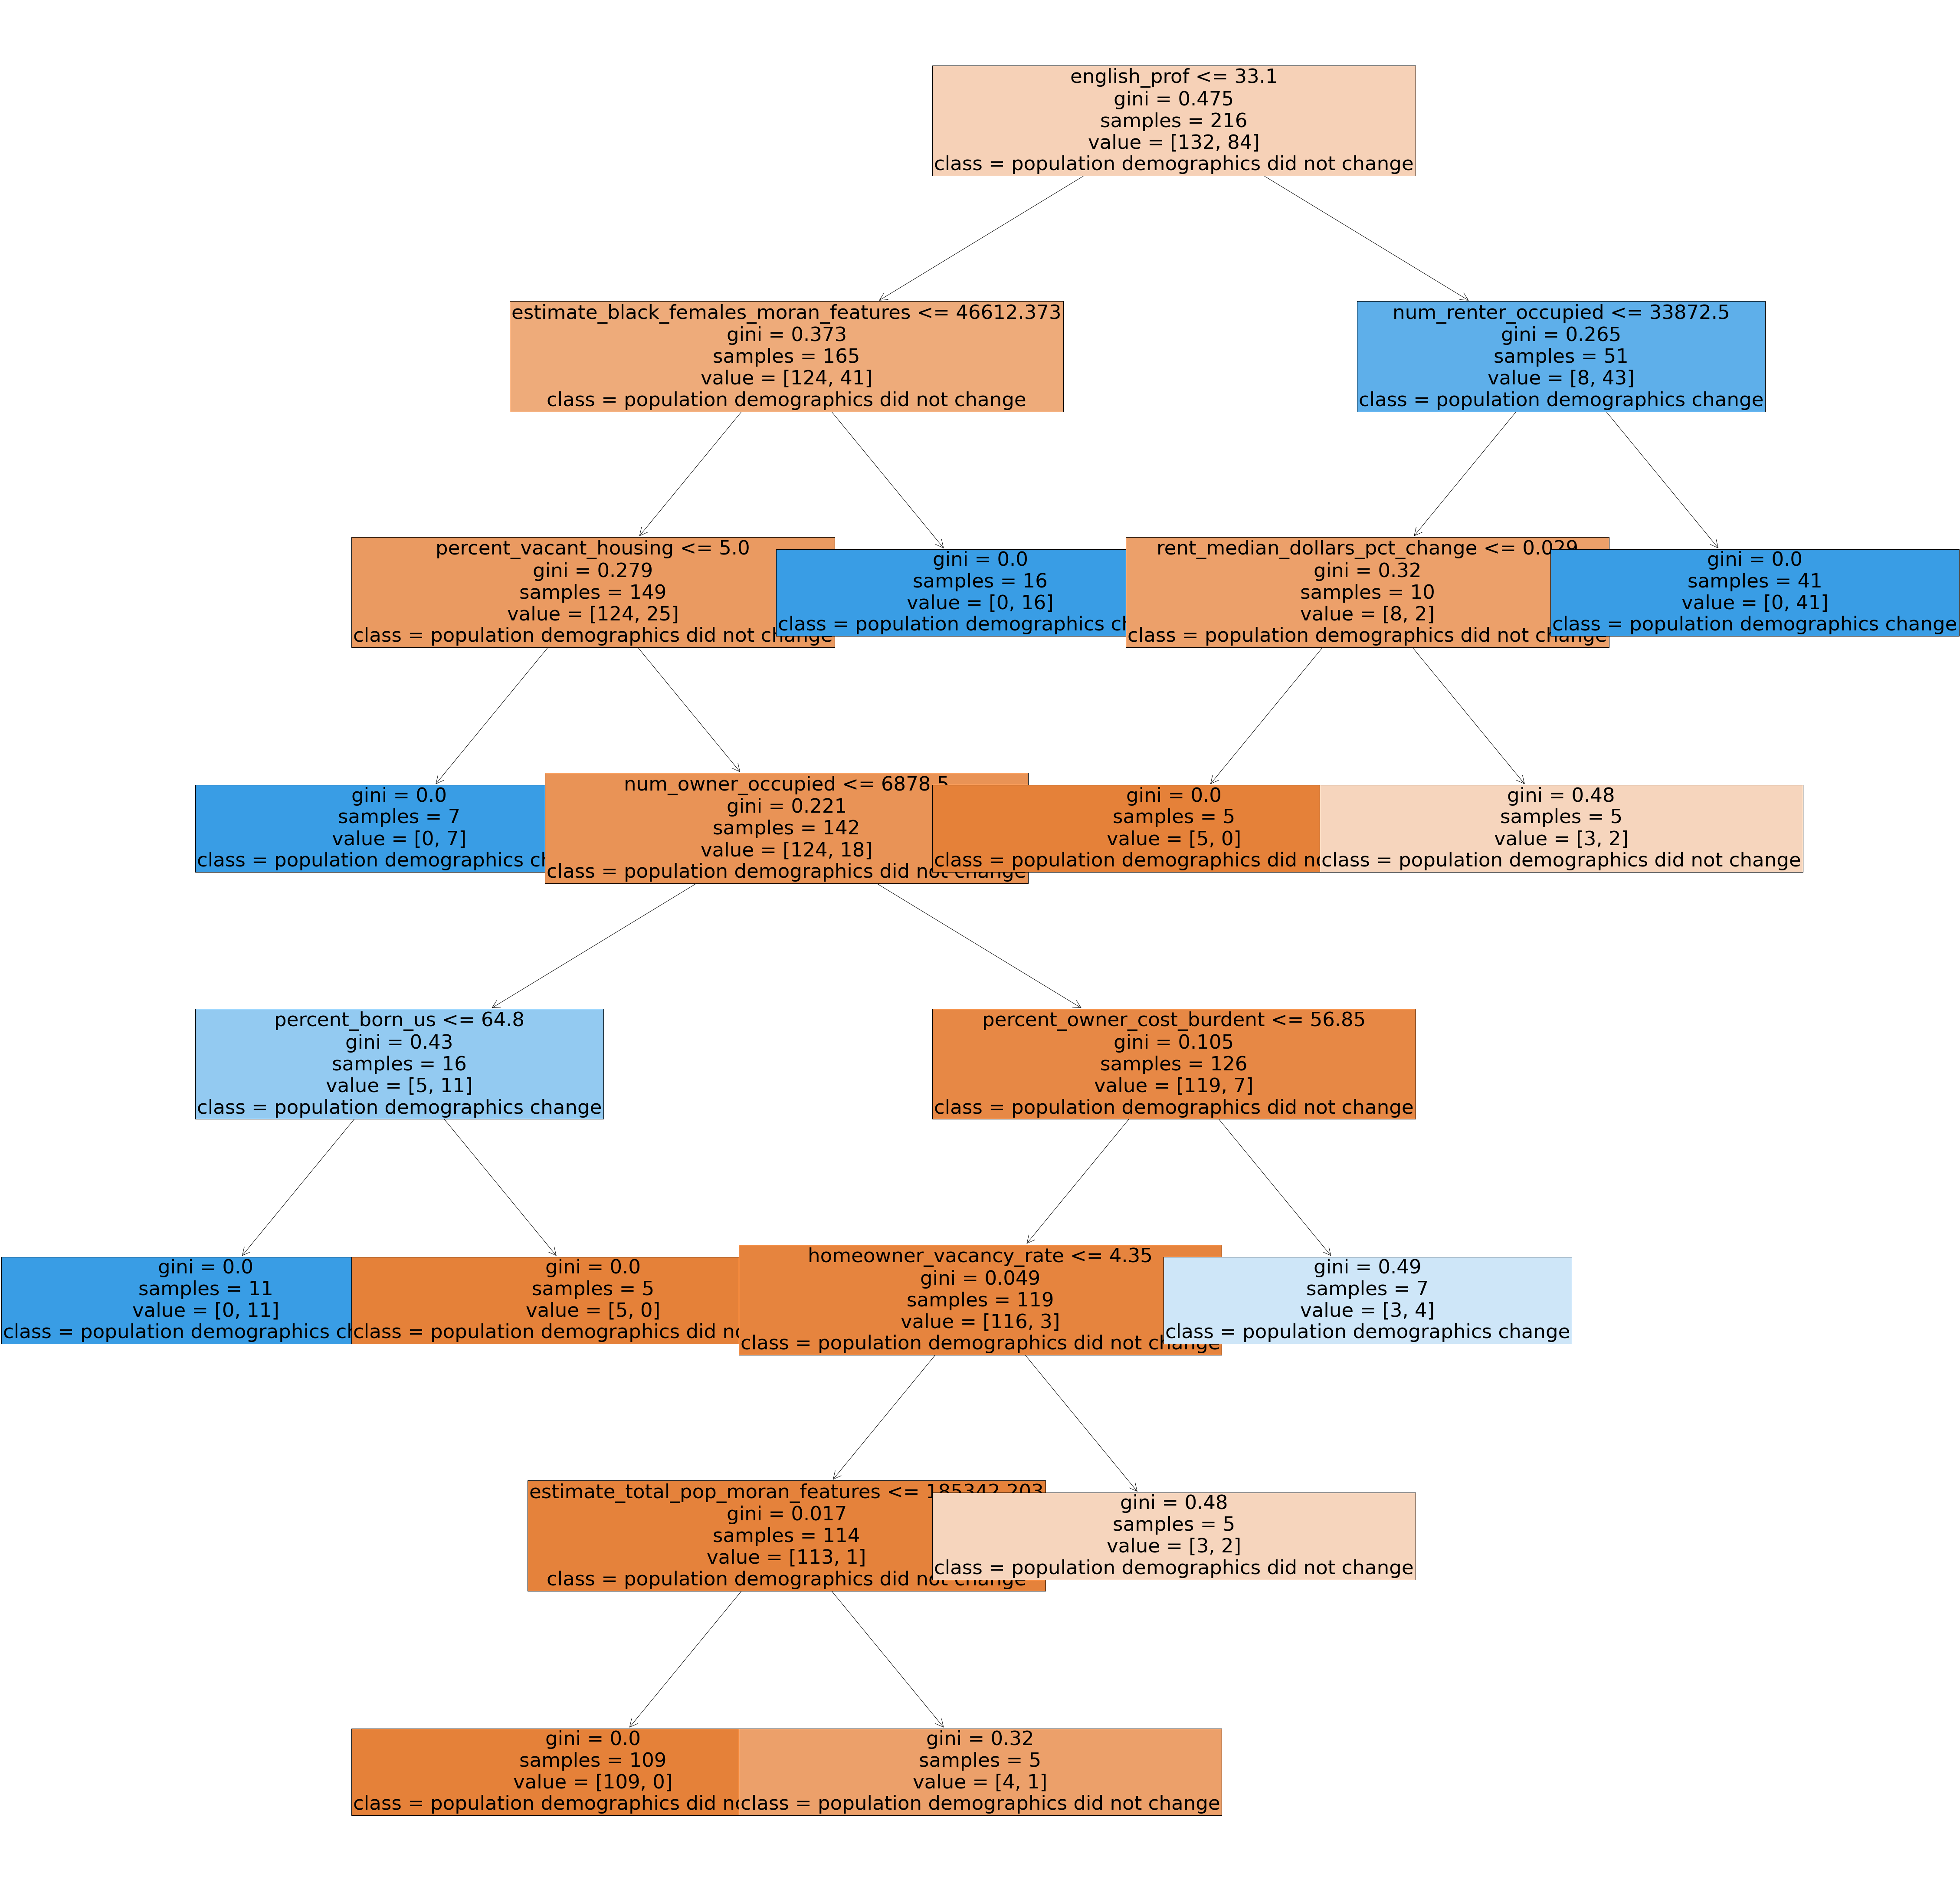

In [537]:
%matplotlib inline
fig = plt.figure(figsize=(80,80))
_ = tree.plot_tree(model, 
                   feature_names=X_train.columns,  
                   class_names=['population demographics did not change','population demographics change'],
                   filled=True, fontsize=45)
plt.show()

In [538]:
import matplotlib.pyplot as plt
%matplotlib inline 
plot_count = 0
figs = []
for idx,roc_plots in enumerate(lst_of_plots):
    ax = roc_plots[1].ax_
    fig =  roc_plots[1].figure_
    year_roc = roc_plots[0]
    ax.set_title( str(year_roc) + ' ROC Curve from Decision tree')
    figs.append(fig)

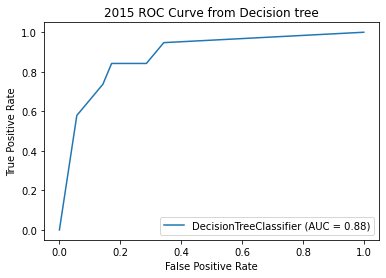

In [539]:
figs[0] # prediction ROC from 2015

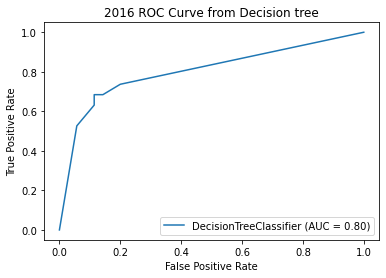

In [540]:
figs[1] # prediction ROC from 2016

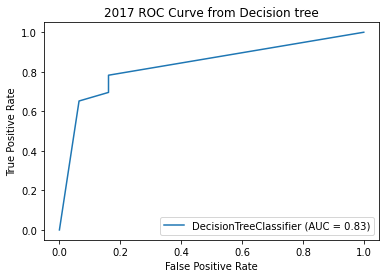

In [541]:
figs[2] # prediction ROC from 2017

**4.4 Method 4**

#### Q: What assumptions need to be verified at this step?
#### A: A random forest finds the best split of the data. Furthermore, it does a bootstrap sample of the data and combines the individual decision tree outputs. Such ensembling prevents over-fitting. However, random forest has the same assumptions as method 3. 
#### Q: What algorithm did you choose?
#### A: Random forest was used as a classifier. 

#### Q: Why you choose this algorithm?
#### A: 
* It reduces overfitting in decision trees and helps to improve the accuracy.
* It works well with both categorical and continuous values.
* It automates missing values present in the data.
* Great with High dimensionality.
* Conducts a feature importance, therefore removes unnecessary variance inflation factors.  

#### Q: What metric can measure the quality of your algorithm?
#### A: We are still using percentage accuracy. A full on classification report for the prediction year of 2017 is also shown that reveals FPR, TPR value.s  ROC curves are also provided. However, we also conducted a feature importance to check whether 
#### Q: What is the outcome?
#### A: The outcome is that we see here, a random forest model outperforms all the other models. Accuracy alone shows that it was higher throughout all the years compared to other models conducted in the prior experiments. Furthermore, from the ROC curves, we see that it has the highest compared to the other models. One big take away as well is that the feature importance of the random forest model proved our hypothesis that gentrification on our data set has spatial dependencies, and that caucasians being mostly rich, are mostly gentrifiers and that if we see them in nearby areas, we might expect the observed location to gentrify. 

#### Q: Analysis and discussion:
#### A: Similar to the KNN the random forest also can have unordered boundaries, which results in similar classification outcomes and accuracy rate as the KNN. However, it does better than a KNN classifier due to the story like process of gentrification fitting to the data. 

In [542]:
# code for modeling
# code for modeling
from sklearn.linear_model import LogisticRegression  
from sklearn.ensemble import RandomForestClassifier 
from IPython.display import clear_output
from collections import defaultdict 
import time
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve 
%matplotlib agg
# time series split 
df = df_to_model.copy().drop(['puma','PUMA','mergeid','geometry'], axis = 1)
completion = 0
lst_of_plots = []
predictions_dict = defaultdict(tuple)
for yr in range(2015, 2018): # we start with 2014 since anything below is not enough data 
    training_df = df[df['year'] < yr].copy()
    target_df  = df[df['year'] == yr].copy()
    cols_to_drop = ['year', 'diversity_change']
    X_train, y_train = training_df.drop(cols_to_drop, axis = 1), training_df['diversity_change'] 
    X_test, y_test =  target_df.drop(cols_to_drop, axis = 1), target_df['diversity_change']
   
    model = RandomForestClassifier(n_estimators=300)
    model.fit(X_train,y_train)
    predictions_dict[yr] = (model.predict(X_test), y_test)
    plot = plot_roc_curve(model,X_test,y_test)
    lst_of_plots.append((yr,plot))
    print(completion /  (2018-2011)*100)
    completion += 1 
    clear_output(wait=True)

28.57142857142857


In [543]:
from sklearn.metrics import classification_report
y_true = predictions_dict[2017][1]
y_pred =  predictions_dict[2017][0]
metrics = classification_report(y_true, y_pred, output_dict=True)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

       False       0.81      0.97      0.88        31
        True       0.94      0.70      0.80        23

    accuracy                           0.85        54
   macro avg       0.88      0.83      0.84        54
weighted avg       0.87      0.85      0.85        54



Text(1.0, 0.506, 'random guess line')

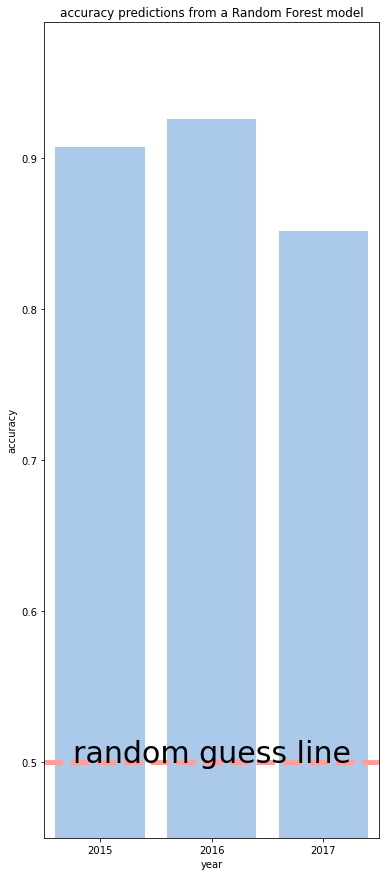

In [544]:
# code for visualization the outcome
from sklearn.metrics import accuracy_score
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")
accuracies_frommodel = []
for key_yr in predictions_dict:
    y_true = predictions_dict[key_yr][1]
    y_pred =  predictions_dict[key_yr][0]
    accuracy = accuracy_score(y_true,y_pred)
    accuracies_frommodel.append([key_yr,accuracy])
acc = pd.DataFrame(accuracies_frommodel,columns= ['year','accuracy'])
g = sns.barplot(x="year", y="accuracy",label="year",data=acc, color = 'b')
ax.set(ylim=(.45, .99))
ax.axhline(.5, ls='--',c='r',lw = 5)
ax.set_title('accuracy predictions from a Random Forest model')
plt.text(1., 0.506, 'random guess line', fontsize=30, va='center', ha='center')

In [545]:
import matplotlib.pyplot as plt
%matplotlib inline 
plot_count = 0
figs = []
for idx,roc_plots in enumerate(lst_of_plots):
    ax = roc_plots[1].ax_
    fig =  roc_plots[1].figure_
    year_roc = roc_plots[0]
    ax.set_title( str(year_roc) + ' ROC Curve from Random Forest Classifier')
    figs.append(fig)

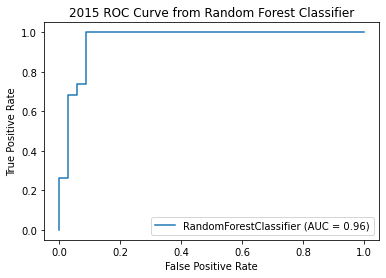

In [546]:
figs[0] # prediction ROC from 2015

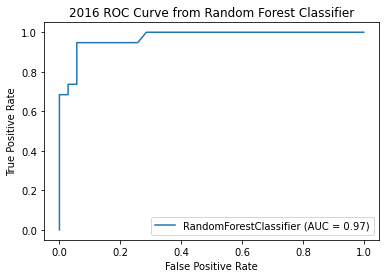

In [547]:
figs[1] # prediction ROC from 2016

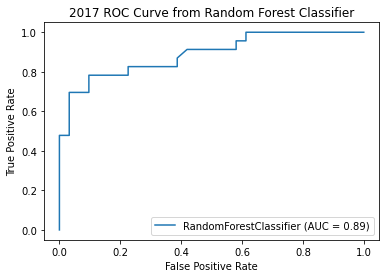

In [548]:
figs[2] # prediction ROC from 2017

<AxesSubplot:title={'center':'top 10 feature importance from Random Forest Model'}>

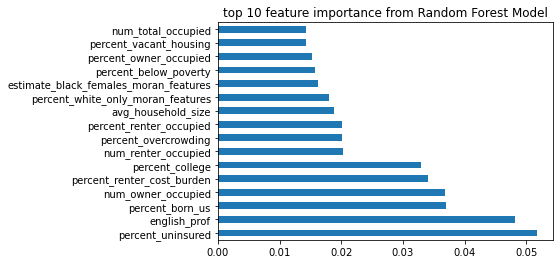

In [549]:
pd.Series(model.feature_importances_, index = X_train.columns).nlargest(16).plot.barh(title = 'top 10 feature importance from Random Forest Model')

# From the above, we have confirmed one of our theories that caucasians are mostly gentrifiers considering that they are the population that is mostly educated. What is interesting here is that the spatial feature of white percent is an important feature when it comes to identifying whether a zip code's diversity would change. For example, in a zip code that might change, its nearby zip code's white population have a significant factor to why it might change.

**4.5 Method 5**

#### Q: What assumptions need to be verified at this step?
#### A: We have this assumption that all models are receiving all identical formatted data, where each feature and dimensions of the data are maintained the same throughout. We will compare how the models classify different items,  under the condition that everything is the smse except for the models itself. Furthermore, a major key assumption here is that the classifiers are independent in their prediction. With this experiment, we therefore answer the question, is a combination of all classifiers better? Or a single use of an algorithm far exceeds the ensemble of these classifiers. 

#### Q: What algorithm did you choose?
#### A: Voting Classifier (ensemble of classifiers; Logistic Regression, Random Forest, Knn Classifier, Gaussian NB) 
#### Q: Why you choose this algorithm?
#### A: One point of using this process is to illustrate the nature of decision boundaries of different classifiers. Particularly in high-dimensional spaces, data can more easily be separated linearly and the simplicity of classifiers such as naive Bayes and linear SVMs might lead to better generalization than is achieved by other classifiers. Using this algorithm we can analyze the best approach of predicting racial migration whether it can assist us in correctly choosing the best classifier while considering all the feature vectors and possible dimensions in our data.  Another point is whether the use of all classifiers into one classifier is best suitable for predicting gentrification. 

#### Q: What metric can measure the quality of your algorithm?
#### A: We used metrics such as accuracy. We also 
#### Q: What is the outcome?
#### A: The outcome suggested that using a Random Forest model will give us the most accurate result. Furthermore, the use of voting classifiers may help generalize future values. While it may have accuracies lower than a Random forest, if for some instance that gentrification changes into a shape much like a Gaussian Model, then an incorporation of a voting classifier may be better for future values. 
#### Q: Analysis and discussion:
#### A: During this last step we also added the Guassasian naive bayes model, this is a very powerful, inclusive yet simple model. We used this as a based comparator to the other model, it is similar to the logistic regression models where it forms a simple patterned boundary.  Furthermore, we added weights to each classifier giving more importance to the Random Forest classifier and the KNN classifier. From prior experiments, we see that they were the best classifiers in terms of predicting gentrification, as such for the voting classifier we gave them more importance. 



In [550]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [551]:
# code for modeling
# code for modeling
from sklearn.linear_model import LogisticRegression  
from sklearn.ensemble import RandomForestClassifier 
from IPython.display import clear_output
from collections import defaultdict 
from sklearn.naive_bayes import GaussianNB
import time
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve 
%matplotlib agg
# time series split 
df = df_to_model.copy().drop(['puma','PUMA','mergeid','geometry'], axis = 1)
completion = 0
lst_of_plots = []
predictions_dict = defaultdict(tuple)
for yr in range(2015, 2018): # we start with 2014 since anything below is not enough data 
    training_df = df[df['year'] < yr].copy()
    target_df  = df[df['year'] == yr].copy()
    cols_to_drop = ['year', 'diversity_change','year_moran_features']
    X_train, y_train = training_df.drop(cols_to_drop, axis = 1), training_df['diversity_change'] 
    X_test, y_test =  target_df.drop(cols_to_drop, axis = 1), target_df['diversity_change']
   
    clf1 = LogisticRegression( random_state=1)
    clf2 = RandomForestClassifier(n_estimators=300, random_state=1)
    clf3 = KNeighborsClassifier(n_neighbors = 3)
    clf4 = GaussianNB()
    eclf1 = VotingClassifier(estimators=[
             ('lr', clf1), ('rf', clf2), ('knn', clf3), ('gnb',clf4)], voting='hard',weights=[1,5,3,1])
 
    eclf1.fit(X_train,y_train)
    predictions_dict[yr] = (eclf1.predict(X_test), y_test)
    #plot = plot_roc_curve(eclf1,X_test,y_test)
    lst_of_plots.append((yr,plot))
    print(completion /  (2018-2011)*100)
    completion += 1 
    clear_output(wait=True)

C:\Users\Voltaire Vergara\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


28.57142857142857


In [552]:
from sklearn.metrics import classification_report
y_true = predictions_dict[2017][1]
y_pred =  predictions_dict[2017][0]
metrics = classification_report(y_true, y_pred, output_dict=True)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

       False       0.79      0.97      0.87        31
        True       0.94      0.65      0.77        23

    accuracy                           0.83        54
   macro avg       0.86      0.81      0.82        54
weighted avg       0.85      0.83      0.83        54



Text(1.0, 0.506, 'random guess line')

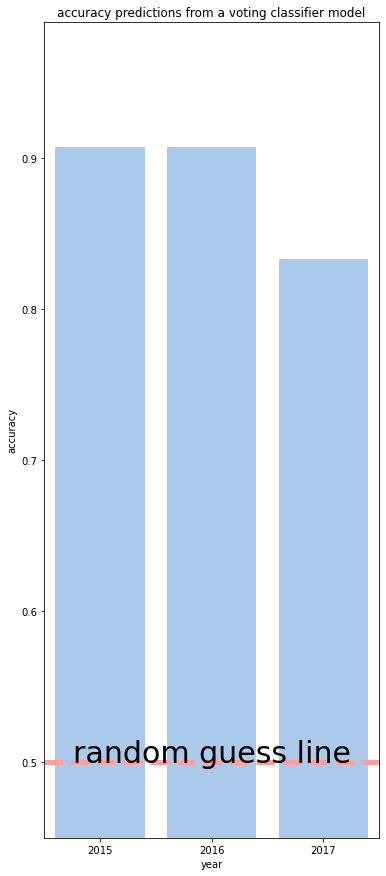

In [553]:
# code for visualization the outcome
from sklearn.metrics import accuracy_score
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")
accuracies_frommodel = []
for key_yr in predictions_dict:
    y_true = predictions_dict[key_yr][1]
    y_pred =  predictions_dict[key_yr][0]
    accuracy = accuracy_score(y_true,y_pred)
    accuracies_frommodel.append([key_yr,accuracy])
acc = pd.DataFrame(accuracies_frommodel,columns= ['year','accuracy'])
g = sns.barplot(x="year", y="accuracy",label="year",data=acc, color = 'b')
ax.set(ylim=(.45, .99))
ax.axhline(.5, ls='--',c='r',lw = 5)
ax.set_title('accuracy predictions from a voting classifier model')
plt.text(1., 0.506, 'random guess line', fontsize=30, va='center', ha='center')

# while the accuracy might be lesser compared to the random forest classifier, this model might be better for prediction of future values considering a voting ensemble classifier is less prone to overfitting. 

In [ ]:
!pip install mlxtend  

In [554]:
# code for visualization the outcome
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

In [555]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
cols_to_drop = ['year', 'diversity_change','year_moran_features']
X, y = pca.fit_transform(df.drop(cols_to_drop, axis = 1).values), df['diversity_change'].values.astype(int) 



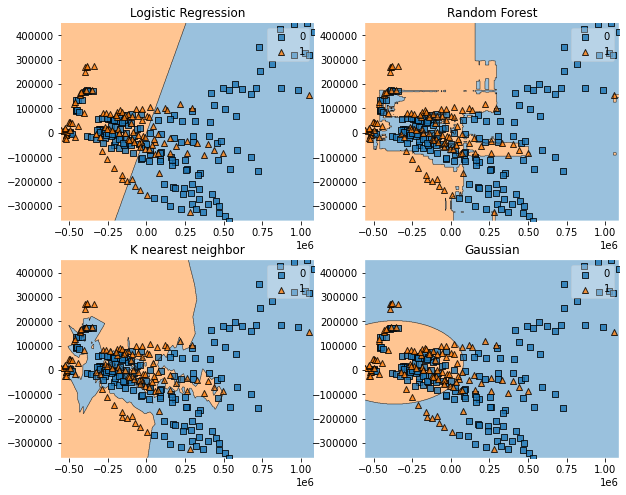

In [556]:
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=300, random_state=1)
clf3 = KNeighborsClassifier(n_neighbors = 3)
clf4 = GaussianNB()
eclf1 = VotingClassifier(estimators=[
         ('lr', clf1), ('rf', clf2), ('knn', clf3), ('gnb',clf4)], voting='hard',weights=[1,5,3,1])
labels = ['Logistic Regression', 'Random Forest', 'K nearest neighbor', 'Gaussian']
fig = plt.figure(figsize=(10,8))
gs = gridspec.GridSpec(2, 2)
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    plt.title(lab)

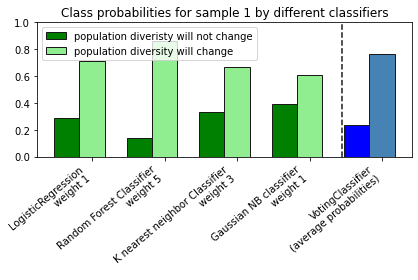

In [558]:
eclf1 = VotingClassifier(estimators=[
         ('lr', clf1), ('rf', clf2), ('knn', clf3), ('gnb',clf4)], voting='soft',weights=[1,5,3,1])
# predict class probabilities for all classifiers
probas = [c.fit(X, y).predict_proba(X) for c in (clf1, clf2, clf3, clf4,eclf1)]

# get class probabilities for the first sample in the dataset
class1_1 = [pr[0, 0] for pr in probas]
class2_1 = [pr[0, 1] for pr in probas]


# plotting

N = 5  # number of groups
ind = np.arange(N)  # group positions
width = 0.35  # bar width

fig, ax = plt.subplots()

# bars for classifier 1-3
p1 = ax.bar(ind, np.hstack(([class1_1[:-1], [0]])), width,
            color='green', edgecolor='k')
p2 = ax.bar(ind + width, np.hstack(([class2_1[:-1], [0]])), width,
            color='lightgreen', edgecolor='k')

# bars for VotingClassifier
p3 = ax.bar(ind, [0, 0, 0, 0,class1_1[-1]], width,
            color='blue', edgecolor='k')
p4 = ax.bar(ind + width, [0, 0, 0,0,class2_1[-1]], width,
            color='steelblue', edgecolor='k')

# plot annotations
plt.axvline(3.8, color='k', linestyle='dashed')
ax.set_xticks(ind + width)
ax.set_xticklabels(['LogisticRegression\nweight 1',
                    'Random Forest Classifier\nweight 5',
                    'K nearest neighbor Classifier\nweight 3',
                    'Gaussian NB classifier\nweight 1',
                    'VotingClassifier\n(average probabilities)'],
                   rotation=40,
                   ha='right')
plt.ylim([0, 1])
plt.title('Class probabilities for sample 1 by different classifiers')
plt.legend([p1[0], p2[0]], ['population diveristy will not change', 'population diversity will change'], loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
print("Hello")

#### 5 Each person contribution

* Voltaire Vergara:Helped with the construction of the machine learning models and graphs. 
* Ze Ming Zhang: Helped with analysis, machine learning implementation, and feature construction and literature review of gentrification. 


#### 6 Example

#### Q: What assumptions need to be verified at this step?
#### A: A Hospital Care chain wants to open a series of Emergency-Care wards within a region. We assume that the hospital knows the location of all the maximum accident-prone areas in the region. They have to decide the number of the Emergency Units to be opened and the location of these Emergency Units, so that all the accident-prone areas are covered in the vicinity of these Emergency Units. We want to help to decide the location of these Emergency Units so that the whole region is covered.
#### Q: What algorithm did you choose?
#### A: k-means
#### Q: Why you choose this algorithm?
#### A: After observing the data, we don't know how many locations there are, and we don't have labelled ground truth data. So we need a clustering algorithm. Kmeans clustering is one of the most popular clustering algorithms and usually the first thing practitioners apply when solving clustering tasks to get an idea of the structure of the dataset. Therefore, we choose k-means algorithm. **I already have completed PCA to map my data to 2 dimension for k-means algorithm.**
#### Q: What metric can measure the quality of your algorithm?
#### A: I would use Percentage of Variance Explained (PVE) to evaluate clustering algorithm.
#### Q: What is the outcome?
#### A: I divided my data into train dataset (contains 90% of data) and test dataset (contains 10% of data). I used the test data to evaluate the outcome of k-means algorithm. In the cluster-predict methodology, we can evaluate how well the models are performing based on different K clusters since clusters are used in the downstream modeling. I will use Elbow method and Silhouette analysis for evaluation.
+ Elbow method:
We use elbow method to check the k we choose.
The following figure shows the result: ...
+ Silhouette analysis: ...

#### Q: Analysis and discussion:
#### A: Accoridng the visualization of clustered data, we could conclude the location of these Emergency Units, which shows in the following image. ......

### Submission guideline:
1. write your code and report in this notebook. 
2. save this notebook as <person1ubname_person2ubname.ipynb>.
3. save your raw data in data folder.
4. save the notebook file with data folder in a folder named <person1ubname_person2ubname.zip>. 
5. upload your zip file to the ub learns.

**Each person from a team needs to make submissions.**

### Grading:
    0 – no submission by deadline;
    5 – complete 1 algorithm with complete analysis and discussion;
    10 – complete 2-3 algorithms with complete analysis and discussion;
    15 – complete 4 algorithms with complete analysis and discussion;
    20 - complete 5 algorithms with complete analysis and discussion, however, the report is the best when compared with other teams;
    25 - the whole process is prefect;
    
The submission deadline is **March 21 on 11:59:00 PM**. (Note 11:59:01 PM will be counted as late submission). Once the deadline is past, you get a zero for the phase if you did not submit anything, even though you need to complete the phase to work on the next phase.
